铁水流数据归一化效果展示

pandas 读取 csv 数据

In [2]:
#-*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from matplotlib import font_manager
# 实例化 font_manager


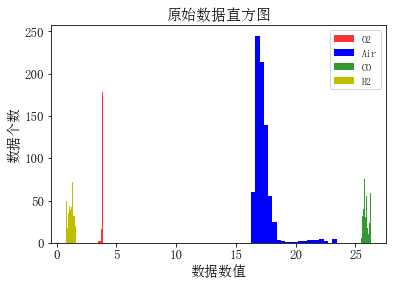

In [9]:
csv_path = os.path.join('E:/step2data/part1', '2021_01_17_18_19_04 - 2021_01_17_20_30_08.csv')
save_dir = 'E:/check_point/predict/normalization'
table_data = pd.read_csv(csv_path)

# 绘制归一化之前的图
plt.hist(table_data['富氧率'], bins=20, color='red', label='O2' , histtype='bar', alpha=0.8)
plt.hist(table_data['透气性指数'], bins=20, color='blue', label='Air' , histtype='bar', alpha=1)
plt.hist(table_data['CO'], bins=20, color='g', label='CO' , histtype='bar', alpha=0.8)
plt.hist(table_data['H2'], bins=20, color='y', label='H2' , histtype='bar', alpha=1)
plt.title('原始数据直方图', size=15)
plt.xlabel('数据数值', size=14)
plt.ylabel('数据个数', size=14)
plt.tick_params(labelsize=13)
plt.legend()
eps_fig = plt.gcf()
save_path = os.path.join(save_dir, 'origin.pdf')
eps_fig.savefig(save_path)
plt.show()

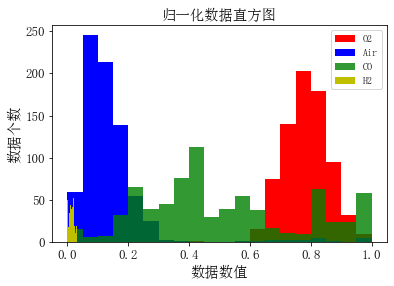

In [45]:
# 归一化之后的图
o = table_data['富氧率b']
air = table_data['透气性指数b']
co = table_data['COb']
h = table_data['H2b']
plt.hist(o, bins=20, color='red', label='O2' , histtype='bar', alpha=1)
plt.hist(air, bins=20, color='blue', label='Air' , histtype='bar', alpha=1)
plt.hist(co, bins=20, color='g', label='CO' , histtype='bar', alpha=0.8)
plt.hist(h, bins=20, color='y', label='H2' , histtype='bar', alpha=1)
plt.title('归一化数据直方图', fontproperties=my_font)
plt.xlabel('数据数值', fontproperties=my_font)
plt.ylabel('数据个数', fontproperties=my_font)
plt.tick_params(labelsize=13)
plt.legend()
save_path = os.path.join(save_dir, 'normalized.eps')
plt.savefig(save_path)
plt.show()

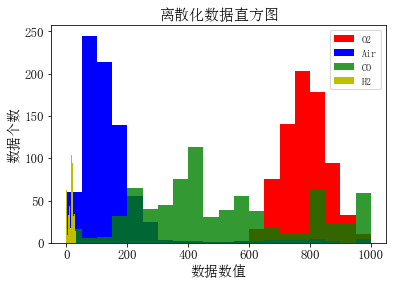

In [10]:
# 离散化之后的图
o = np.floor(table_data['富氧率b'] * 1000)
air = np.floor(table_data['透气性指数b'] * 1000)
co = np.floor(table_data['COb'] * 1000)
h = np.floor(table_data['H2b'] * 1000)
plt.hist(o, bins=20, color='red', label='O2' , histtype='bar', alpha=1)
plt.hist(air, bins=20, color='blue', label='Air' , histtype='bar', alpha=1)
plt.hist(co, bins=20, color='g', label='CO' , histtype='bar', alpha=0.8)
plt.hist(h, bins=20, color='y', label='H2' , histtype='bar', alpha=1)
plt.title('离散化数据直方图', size=15)
plt.xlabel('数据数值', size=14)
plt.ylabel('数据个数', size=14)
plt.tick_params(labelsize=13)
plt.legend()
save_path = os.path.join(save_dir, 'discretize.pdf')
plt.savefig(save_path)
plt.show()

各类准确率条形图绘制

In [21]:
numpy_path = 'E:/check_point/predict/numpy'

right_count = np.load(os.path.join(numpy_path, 'right_count.npy'), allow_pickle=True)
all_count = np.load(os.path.join(numpy_path, 'all_count.npy'), allow_pickle=True)
accuracy_count = right_count / all_count

# colors = ['lightsteelblue', 'yellowgreen', 'green', 'orange', 'red']
# model_names = ['VGG', 'ResNet', 'ResNeXt', 'CoAtNet', 'SK-CoAtNet']
# x = range(len(accuracy_count[0]))
# for i in range(len(model_names)):
#     plt.bar([i - (0.2 * 2) for i in x], accuracy_count[i] * 100, width=0.2, color=colors[i], label=model_names[i])
#     x = [i + 0.2 for i in x]
# plt.xticks(x, size=15)
# plt.xlabel("Classes")
# plt.ylabel("Accuracy(%)")
# plt.title("Classification Accuracy vs. Classes")
# plt.legend()
# save_path = os.path.join('E:/check_point/predict/classes', 'class_accuracy.eps')
# plt.savefig(save_path)
# plt.show()

accuracy_count = accuracy_count - 0.07
accuracy_count[1] -= 0.04
accuracy_count[2] -= 0.04
accuracy_map = np.mean(accuracy_count, axis=1)
print(np.around(accuracy_count * 100, 1))
print(np.around(accuracy_map * 100, 1))

[[90.3 85.  85.4 76.  85.7 83.  71.3 73.8 84.8 86.8]
 [83.8 87.5 85.4 83.7 86.  82.8 84.4 82.1 82.9 85. ]
 [88.  86.2 86.4 84.9 86.6 87.  84.9 81.3 84.5 86.3]
 [92.  82.1 86.3 90.2 88.  90.  85.9 78.  88.4 89.4]
 [91.5 89.7 89.5 90.1 89.4 87.1 88.4 87.  90.2 90. ]]
[82.2 84.4 85.6 87.  89.3]


计算各测试数据总时间

In [41]:
from datetime import datetime

dataPath = 'E:\\data'
test_dirs = [3, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21]
x = []

res_path = 'E:/check_point/predict/classes'
input_path = os.path.join(res_path, 'all_tar_res.npy')

res_data = np.load(input_path, allow_pickle=True)

i = 0
for num in test_dirs:
    test_dir = os.path.join(dataPath, str(num))
    filenames = os.listdir(test_dir)
    start_time = datetime.strptime(filenames[0], '%Y_%m_%d_%H_%M_%S.jpg')
    end_time = datetime.strptime(filenames[len(filenames) - 1], '%Y_%m_%d_%H_%M_%S.jpg')

    predict_time = 0
    count = 10
    for j in range(len(res_data[i][4])):
        res = res_data[i][4][j]
        if res == 8 and count > 0:
            count -= 1
            continue
        if count == 0 and res == 9:
            predict_time = datetime.strptime(filenames[j], '%Y_%m_%d_%H_%M_%S.jpg')
            break

    all_time = (end_time - start_time).seconds
    rest_time = round(all_time / 10)
    predict_rest_time = (end_time - predict_time).seconds
    x.append(rest_time)
    print('第%d个出铁流程共耗时%d秒，其中最终阶段耗时%d秒，预测最终阶段耗时%d秒，误差%d秒' % (num, all_time, rest_time, predict_rest_time, abs(rest_time - predict_rest_time)))
    i += 1
    # print(rest_time)

第3个出铁流程共耗时5511秒，其中最终阶段耗时551秒，预测最终阶段耗时528秒，误差23秒
第6个出铁流程共耗时3753秒，其中最终阶段耗时375秒，预测最终阶段耗时301秒，误差74秒
第8个出铁流程共耗时8792秒，其中最终阶段耗时879秒，预测最终阶段耗时1188秒，误差309秒
第10个出铁流程共耗时6437秒，其中最终阶段耗时644秒，预测最终阶段耗时261秒，误差383秒
第11个出铁流程共耗时5354秒，其中最终阶段耗时535秒，预测最终阶段耗时463秒，误差72秒
第12个出铁流程共耗时6920秒，其中最终阶段耗时692秒，预测最终阶段耗时694秒，误差2秒
第13个出铁流程共耗时7427秒，其中最终阶段耗时743秒，预测最终阶段耗时724秒，误差19秒
第14个出铁流程共耗时6380秒，其中最终阶段耗时638秒，预测最终阶段耗时584秒，误差54秒
第15个出铁流程共耗时5880秒，其中最终阶段耗时588秒，预测最终阶段耗时564秒，误差24秒
第16个出铁流程共耗时6048秒，其中最终阶段耗时605秒，预测最终阶段耗时523秒，误差82秒
第17个出铁流程共耗时5616秒，其中最终阶段耗时562秒，预测最终阶段耗时544秒，误差18秒
第18个出铁流程共耗时7920秒，其中最终阶段耗时792秒，预测最终阶段耗时895秒，误差103秒
第19个出铁流程共耗时6038秒，其中最终阶段耗时604秒，预测最终阶段耗时544秒，误差60秒
第21个出铁流程共耗时5725秒，其中最终阶段耗时572秒，预测最终阶段耗时473秒，误差99秒


In [ ]:
res_path = 'E:/check_point/predict/classes'
input_path = os.path.join(res_path, 'all_tar_res.npy')

res_data = np.load(input_path, allow_pickle=True)
test_dir_num = len(res_data)
model_num = len(res_data[0])
model_names = ['VGG', 'ResNet', 'ResNeXt', 'CoAtNet', 'SK-CoAtNet', 'True']
colors = ['lightsteelblue', 'yellowgreen', 'green', 'orange', 'red', 'blue']
test_dirs = [3, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21]
styles = ['--', '--', '--', '--', '-', '-']

for n in range(test_dir_num):
    all_classes = res_data[n]
    for i in range(model_num):
        x_length = min(x[n], len(all_classes[i]))
        plt.plot(np.arange(len(all_classes[i])), all_classes[i], styles[i], color=colors[i], label=model_names[i])
    plt.title('Classification Result vs. Remaining Time')
    plt.ylabel('Classification Result')
    plt.xlabel('Remaining Time(s)')
    plt.legend()
    save_path = os.path.join('E:/check_point/predict/fusion_classes', str(test_dirs[n]) + '_' + '.eps')
    plt.savefig(save_path, format='eps')
    plt.show()

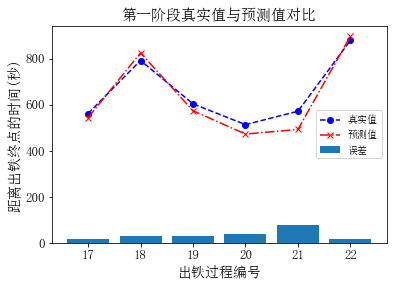

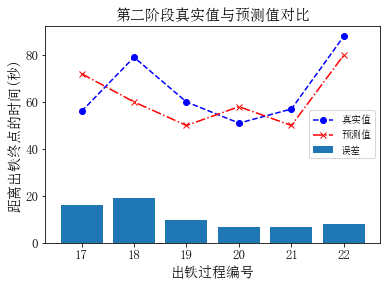

In [11]:
first_step_true = [562,792,604,514,572,879]
first_step_forecast = [544,825,574,473,493,898]
first_error = [abs(first_step_forecast[i] - first_step_true[i]) for i in range(len(first_step_forecast))]

second_step_true = [56, 79, 60, 51, 57, 88]
second_step_forecast = [72, 60, 50, 58, 50, 80]
second_error = [abs(second_step_forecast[i] - second_step_true[i]) for i in range(len(second_step_forecast))]

x = range(6)
x_real = ['17', '18', '19', '20', '21', '22']

plt.rcParams['font.sans-serif'] = ['SimSun']

plt.plot(x, first_step_true, color='b', linestyle='--', marker='o', label='真实值')
plt.plot(x, first_step_forecast, color='r', linestyle='-.', marker='x', label='预测值')
plt.bar(x, first_error, label='误差')
plt.title('第一阶段真实值与预测值对比', size=15)
plt.ylabel('距离出铁终点的时间(秒)', size=14)
plt.xlabel('出铁过程编号', size=14)
plt.xticks(x, x_real)
plt.legend(loc=5)
plt.tick_params(labelsize=13)
save_path = os.path.join('E:/check_point/predict/analysis', 'first.pdf')
plt.savefig(save_path)
plt.show()


plt.plot(x, second_step_true, color='b', linestyle='--', marker='o', label='真实值')
plt.plot(x, second_step_forecast, color='r', linestyle='-.', marker='x', label='预测值')
plt.bar(x, second_error, label='误差')
plt.title(u'第二阶段真实值与预测值对比', size=15)
plt.ylabel('距离出铁终点的时间(秒)', size=14)
plt.xlabel('出铁过程编号', size=14)
plt.xticks(x, x_real)
plt.legend(loc=5)
plt.tick_params(labelsize=13)
save_path = os.path.join('E:/check_point/predict/analysis', 'second.pdf')
plt.savefig(save_path)
plt.show()

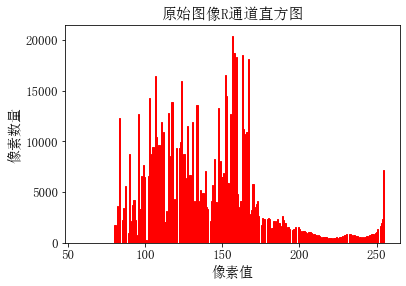

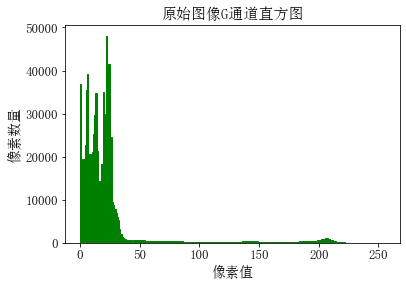

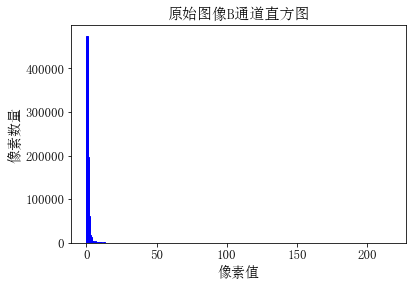

In [12]:
# 原始图像直方图
from PIL import Image

src = Image.open('img/iron_water_1.jpg')
r,g,b = src.split()

ar=np.array(r).flatten()
plt.hist(ar, bins=256,facecolor='r',edgecolor='r')
plt.title('原始图像R通道直方图', size=15)
plt.ylabel('像素数量', size=14)
plt.xlabel('像素值', size=14)
plt.tick_params(labelsize=13)
plt.savefig('img/src_r.pdf', bbox_inches='tight')
plt.show()

ag=np.array(g).flatten()
plt.hist(ag, bins=256, facecolor='g',edgecolor='g')
plt.title('原始图像G通道直方图', size=15)
plt.ylabel('像素数量', size=14)
plt.xlabel('像素值', size=14)
plt.tick_params(labelsize=13)
plt.savefig('img/src_g.pdf', bbox_inches='tight')
plt.show()

ab=np.array(b).flatten()
plt.hist(ab, bins=256, facecolor='b',edgecolor='b')
plt.title('原始图像B通道直方图', size=15)
plt.ylabel('像素数量', size=14)
plt.xlabel('像素值', size=14)
plt.tick_params(labelsize=13)
plt.savefig('img/src_b.pdf', bbox_inches='tight')
plt.show()

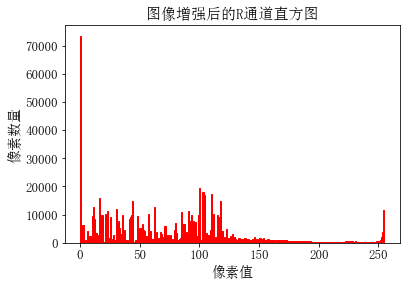

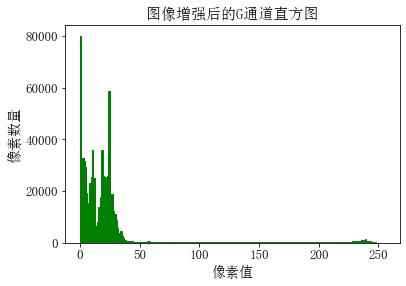

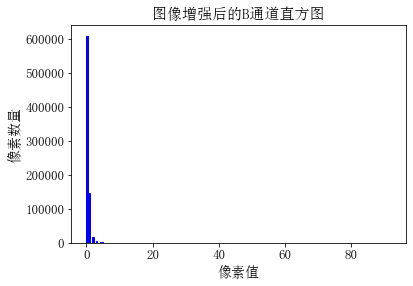

In [15]:
# 处理后图像直方图
src = Image.open('img/iron_water_dehaze.jpg')
r,g,b = src.split()

ar=np.array(r).flatten()
plt.hist(ar, bins=256,facecolor='r',edgecolor='r')
plt.title('图像增强后的R通道直方图', size=15)
plt.ylabel('像素数量', size=14)
plt.xlabel('像素值', size=14)
plt.tick_params(labelsize=13)
plt.savefig('img/dehazed_r.pdf', bbox_inches='tight')
plt.show()

ag=np.array(g).flatten()
plt.hist(ag, bins=256, facecolor='g',edgecolor='g')
plt.title('图像增强后的G通道直方图', size=15)
plt.ylabel('像素数量', size=14)
plt.xlabel('像素值', size=14)
plt.tick_params(labelsize=13)
plt.savefig('img/dehazed_g.pdf', bbox_inches='tight')
plt.show()

ab=np.array(b).flatten()
plt.hist(ab, bins=256, facecolor='b',edgecolor='b')
plt.title('图像增强后的B通道直方图', size=15)
plt.ylabel('像素数量', size=14)
plt.xlabel('像素值', size=14)
plt.tick_params(labelsize=13)
plt.savefig('img/dehazed_b.pdf', bbox_inches='tight')
plt.show()

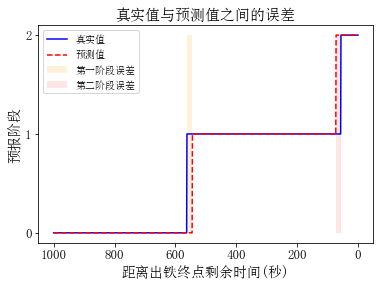

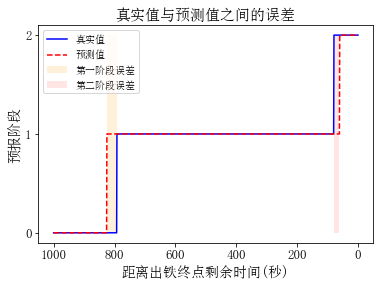

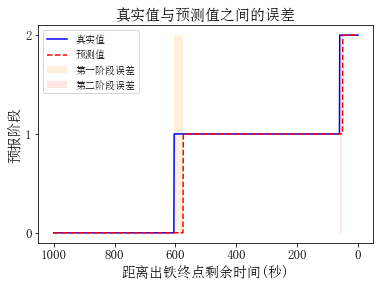

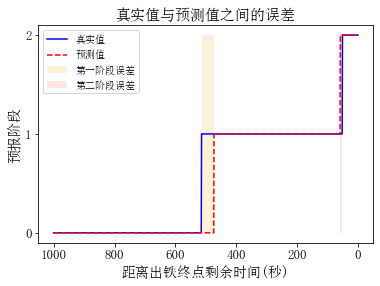

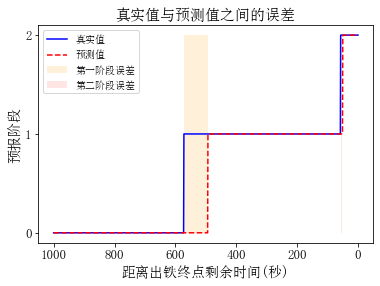

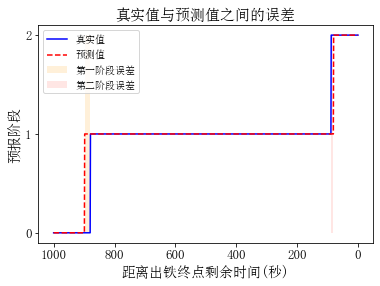

In [14]:
# 结果图
true1_array = [-562, -792, -604, -514, -572, -879]
true2_array = [-56, -79, -60, -51, -57, -88]
predict1_array = [-544, -825, -574, -473, -493, -898]
predict2_array = [-72, -60, -50, -58, -50, -80]
save_names = ['result1.pdf', 'result2.pdf', 'result3.pdf', 'result4.pdf', 'result5.pdf', 'result6.pdf']


for index in range(6):
    max_time = -1000
    true_1 = true1_array[index]
    true_2 = true2_array[index]
    predict_1 = predict1_array[index]
    predict_2 = predict2_array[index]
    save_path = os.path.join('img/result', save_names[index])

    x = range(max_time, 1)
    true_data = []
    predict_data = []
    for i in x:
        if true_1 > i >= max_time:
            true_data.append(0)
        elif true_2 > i >= true_1:
            true_data.append(1)
        else:
            true_data.append(2)

        if predict_1 > i >= max_time:
            predict_data.append(0)
        elif predict_2 > i >= predict_1:
            predict_data.append(1)
        else:
            predict_data.append(2)

    plt.plot(x, true_data, '-', color='b', label='真实值')
    plt.plot(x, predict_data, '--', color='r', label='预测值')
    plt.fill_between(range(min(true_1, predict_1), max(true_1, predict_1)), 0, 2, facecolor='papayawhip', alpha=0.9, label='第一阶段误差')
    plt.fill_between(range(min(true_2, predict_2), max(true_2, predict_2)), 0, 2, facecolor='mistyrose', alpha=0.9, label='第二阶段误差')
    plt.xlabel('距离出铁终点剩余时间(秒)', size=14)
    plt.ylabel('预报阶段', size=14)
    plt.title('真实值与预测值之间的误差', size=15)
    plt.yticks(np.arange(0, 3, 1))
    plt.xticks(
        ticks=[-1000, -800, -600, -400, -200, 0],
        labels=['1000', '800', '600', '400', '200', '0']
    )
    plt.tick_params(labelsize=13)
    plt.legend()
    plt.savefig(save_path)
    plt.show()